# Interpolation in 4 dimensions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here is a function that depends on 5 free parameters. 
In this example class we generate many samples of the function and 
then try to build an interpolator that approximates this function as accurately as possible.

You can think of this function as a time series that depends on paramaters a,b,...,e.

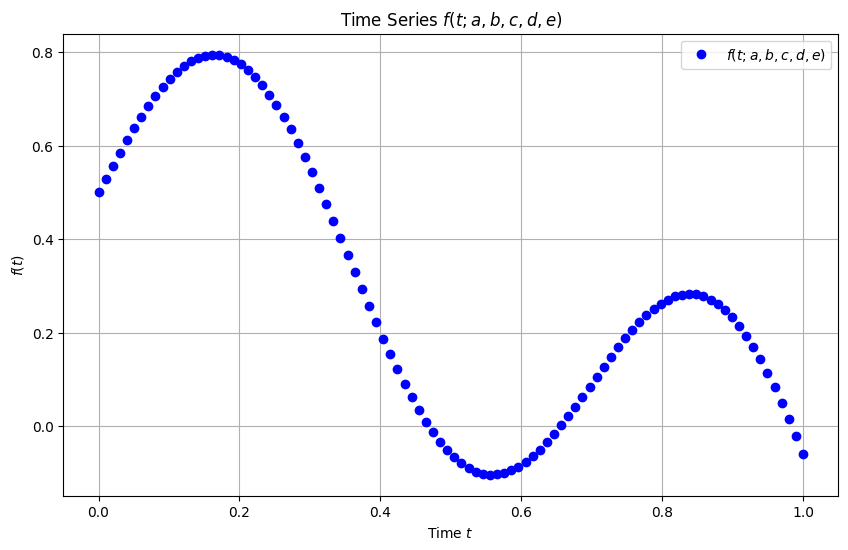

In [3]:


def f(t, a, b, c):
    d = 0.5
    e = 2.0
    return np.sqrt(a) * np.exp(-b * t) * np.sin(c * t) + d * np.cos(e * t)

# Example usage
# Define parameters
a = 0.1
b = -0.13
c = 9


# Define time range
t = np.linspace(0, 1, 100)  # time from 0 to 1 with 100 points

# Calculate f(t) for these parameters
f_values = f(t, a, b, c, d, e)

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c, d, e)$', color='blue',ls='None',marker='o')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c, d, e)$')
plt.legend()
plt.grid(True)
plt.show()


## Question 1

Consider all values are fixed and create an interpolator with respect to time $t$.

In [5]:
from scipy.interpolate import interp1d

# Define time points and corresponding function values for a specific `a`
x = t  # Time points, assumed to be defined previously
y = f_values  # Function values at each time point `t` for a fixed `a`

# Create the interpolator function with respect to time `t`
F_interp_t = interp1d(x, y, kind='linear', fill_value="extrapolate")

## Question 2

Evaluate the interpolator on a much finer grid than the original $t$ grid. 

In [6]:
# Now you can use `F_interp_t` to interpolate the function at any time `t_new`
# Example:
t_new = np.linspace(0, 1, 1001) # An example time point within the range
f_value_at_t_new = F_interp_t(t_new)  # Interpolated value at t_new

## Question 3

Show the results

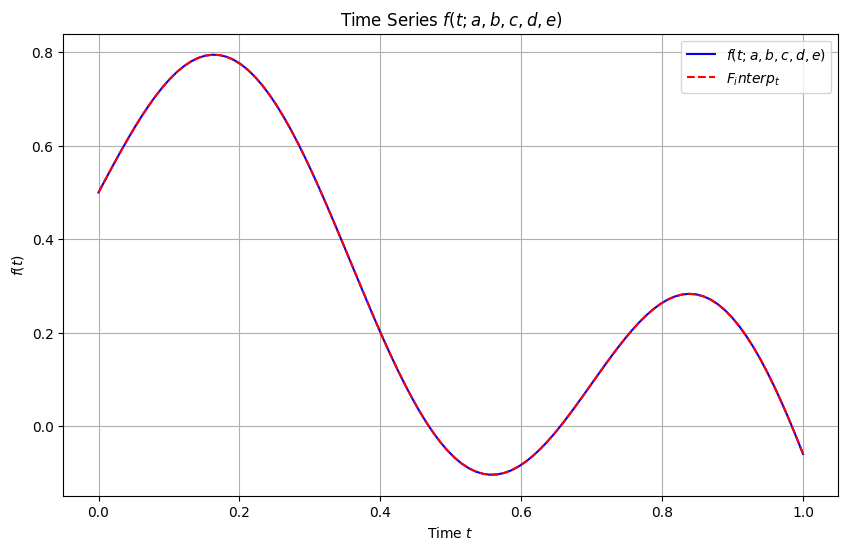

In [7]:

# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f_values, label=r'$f(t; a, b, c, d, e)$', color='blue')
plt.plot(t_new, f_value_at_t_new, label=r'$F_interp_t$', color='red',ls='--')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c, d, e)$')
plt.legend()
plt.grid(True)
plt.show()

## Question 4

Show the ratio of the interpolated values to true values. 


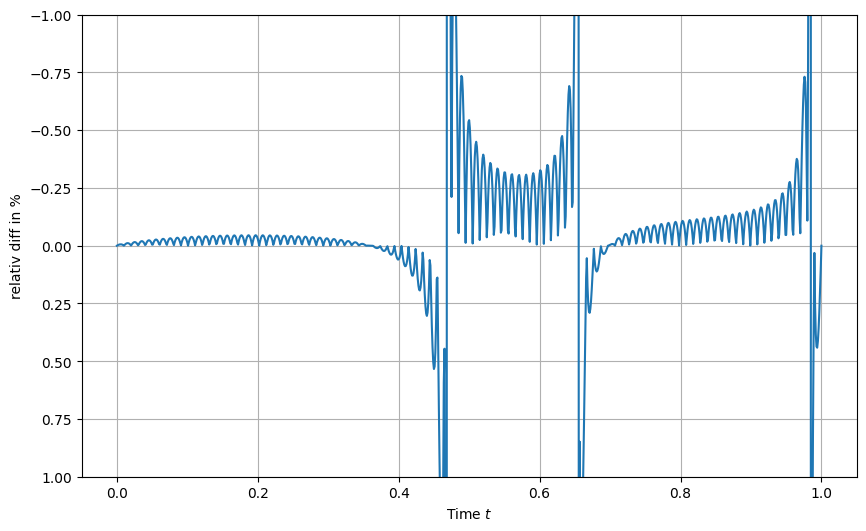

In [8]:
# Plot the function
plt.figure(figsize=(10, 6))

r = 100*(f_value_at_t_new-f(t_new, a, b, c, d, e))/f(t_new, a, b, c, d, e)
plt.plot(t_new, r)
plt.xlabel('Time $t$')
plt.ylabel(r'relativ diff in %')

plt.ylim(1,-1)
plt.grid(True)
plt.show()

## Question 5

Consider now all paramaters fixed except $a$. 

We assume the parameter $a$ can take values between 0 and 1.

Generate 10 samples of $f$ (i.e., 10 time series)  corresponding to linearly spaced values of $a$ spanning the interval.

Store them in a DataFrame. 

<span style="color:red">
We us `np.linspace`



</span>

In [9]:
import pandas as pd


# Generate 10 linearly spaced values of `a` from 0. to 1.0
a_values = np.linspace(0., 1.0, 10)

# Generate samples and store them in a DataFrame with labels from 1 to 10
f_samples_labeled = {str(i+1): f(t, a, b, c, d, e) for i, a in enumerate(a_values)}
f_samples_labeled_df = pd.DataFrame(f_samples_labeled, index=t)
f_samples_labeled_df


,1,2,3,4,5,6,7,8,9,10
0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000
0.010101,0.499898,0.530199,0.542750,0.552381,0.560500,0.567653,0.574120,0.580067,0.585602,0.590801
0.020202,0.499592,0.560023,0.585055,0.604262,0.620454,0.634720,0.647618,0.659478,0.670517,0.680886
0.030303,0.499082,0.589223,0.626560,0.655210,0.679363,0.700643,0.719881,0.737572,0.754038,0.769504
0.040404,0.498368,0.617551,0.666918,0.704799,0.736734,0.764869,0.790305,0.813696,0.835468,0.855917
...,...,...,...,...,...,...,...,...,...,...
0.959596,-0.170695,0.097127,0.208063,0.293187,0.364950,0.428174,0.485333,0.537896,0.586821,0.632772
0.969697,-0.180154,0.062714,0.163313,0.240505,0.305581,0.362914,0.414747,0.462413,0.506779,0.548448
0.979798,-0.189539,0.026299,0.115702,0.184303,0.242137,0.293089,0.339154,0.381515,0.420943,0.457975
0.989899,-0.198847,-0.011895,0.065544,0.124964,0.175058,0.219191,0.259091,0.295782,0.329934,0.362010


<AxesSubplot: >

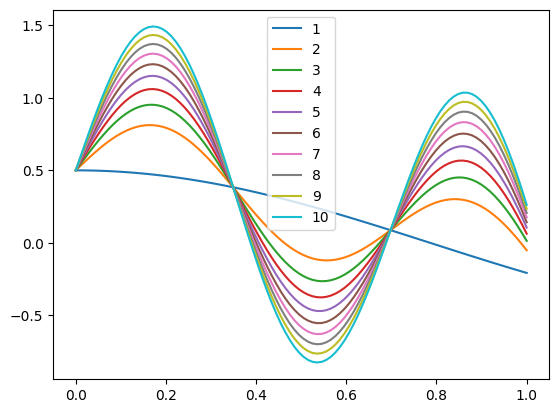

In [10]:
f_samples_labeled_df.plot(legend=True)

## Question 6 

Create an interpolator that interpolates over $a$ and returns the full time series (i.e., values of $f$ for all time points). 

In [12]:
from scipy.interpolate import RegularGridInterpolator

# Convert the DataFrame to a 2D NumPy array with shape (len(t), len(a_values))
f_values_matrix = f_samples_labeled_df.values  # Shape: (100, 10) in this example

# Create an interpolator across `a` and `t`
interpolator = RegularGridInterpolator((t, a_values), f_values_matrix, method="linear", bounds_error=False, fill_value=None)

# Define a function that interpolates over a new `a` value
def interpolate_f_over_a(new_a):
    # Create a mesh of (time, new_a) points
    query_points = np.array([(time, new_a) for time in t])
    
    # Interpolate at all time points for the given new `a`
    return interpolator(query_points)


Plot the result for $a=0.125$

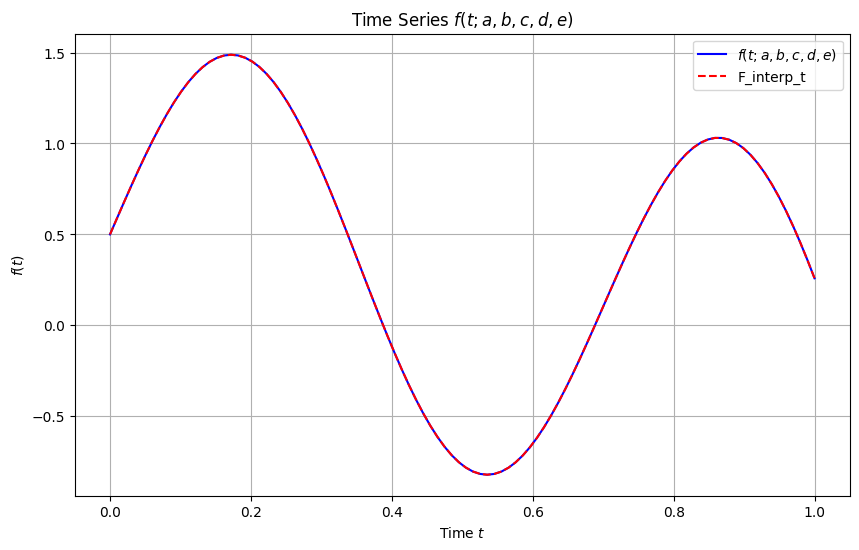

In [13]:
ap = 0.989899
# Plot the function
plt.figure(figsize=(10, 6))
plt.plot(t, f(t, ap, b, c, d, e), label=r'$f(t; a, b, c, d, e)$', color='blue')
plt.plot(t, interpolate_f_over_a(ap), label=r'F_interp_t', color='red',ls='--')
plt.xlabel('Time $t$')
plt.ylabel(r'$f(t)$')
plt.title(r'Time Series $f(t; a, b, c, d, e)$')
plt.legend()
plt.grid(True)
plt.show()

Plot the ratio

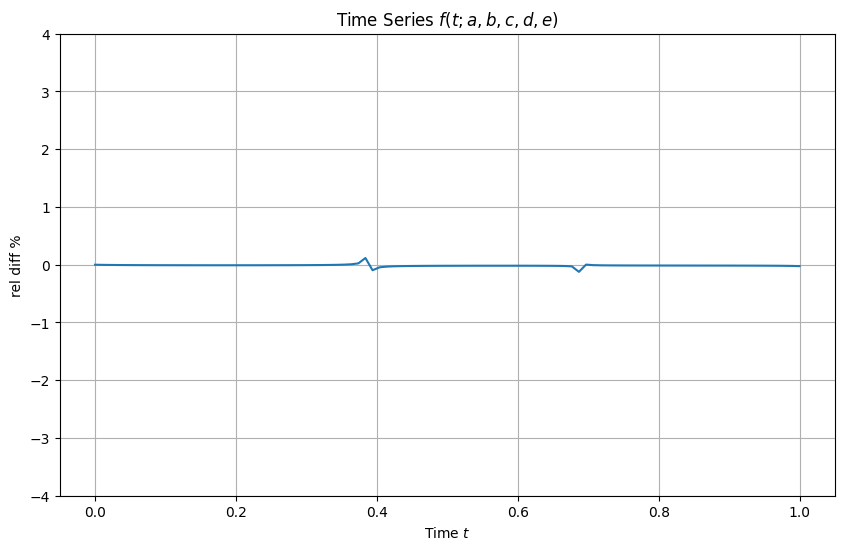

In [14]:
ap = 0.989899
# Plot the function
plt.figure(figsize=(10, 6))
r = 100*(interpolate_f_over_a(ap)/f(t, ap, b, c, d, e) - 1 )
plt.plot(t,r)
plt.xlabel('Time $t$')
plt.ylabel(r'rel diff %')
plt.title(r'Time Series $f(t; a, b, c, d, e)$')
plt.grid(True)
plt.ylim(-4.,4.)
plt.show()

## Question 7

Use `widgets` from `ipywidgets` to create a sliding scale of `a` values. 
What do you observe? Does it make sense?

In [15]:
t

array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
       0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
       0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
       0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
       0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
       0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
       0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
       0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
       0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
       0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
       0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
       0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
       0.60606061, 0.61616162, 0.62626263, 0.63636364, 0.64646465,
       0.65656566, 0.66666667, 0.67676768, 0.68686869, 0.6969697 ,
       0.70707071, 0.71717172, 0.72727273, 0.73737374, 0.74747

In [16]:
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

# Define the slider function to update the plot
def plot_interpolated_relative_difference(ap):
    # Calculate the relative difference
    r = 100 * (interpolate_f_over_a(ap) / f(t, ap, b, c, d, e) - 1.)
    
    # Plot the relative difference
    plt.figure(figsize=(10, 6))
    plt.plot(t, r)
    plt.xlabel('Time $t$')
    plt.ylabel(r'Relative Difference %')
    plt.title(r'Time Series $f(t; a, b, c, d, e)$')
    plt.ylim(-10,10)
    plt.grid(True)
    plt.show()

# Define the slider for `ap`
ap_slider = FloatSlider(value=0.145, min=0., max=1.0, step=0.001, description='ap')

# Use `interact` to create the interactive plot
interact(plot_interpolated_relative_difference, ap=ap_slider)

interactive(children=(FloatSlider(value=0.145, description='ap', max=1.0, step=0.001), Output()), _dom_classes…

<function __main__.plot_interpolated_relative_difference(ap)>

## Question 9 

We will now consider both $a$ and $b$ as interpolation parameters. 
Our interpolator should therefore interpolate in time $t$ but also accross $a$ and $b$ range. 

Generate $10^2$ sample spanning the rand $0<a<1$ and $-0.5<b<0.5$ using latin hyper cube.

In [17]:
import numpy as np
import pandas as pd
from scipy.interpolate import RegularGridInterpolator
from pyDOE import lhs  # For Latin Hypercube Sampling

# Define the ranges for `a`, `b`, and `t`
t = np.linspace(0, 1, 100)  # Time range with 100 points
a_range = (0., 1.0)
b_range = (-0.5, 0.5)

# Generate Latin Hypercube samples for `a` and `b`
n_samples = 100  # Define the number of samples for each parameter
lhs_samples = lhs(2, samples=n_samples)  # Latin Hypercube sampling in 2D



# Scale the samples to the range of `a` and `b`
a_values = a_range[0] + lhs_samples[:, 0] * (a_range[1] - a_range[0])
b_values = b_range[0] + lhs_samples[:, 1] * (b_range[1] - b_range[0])


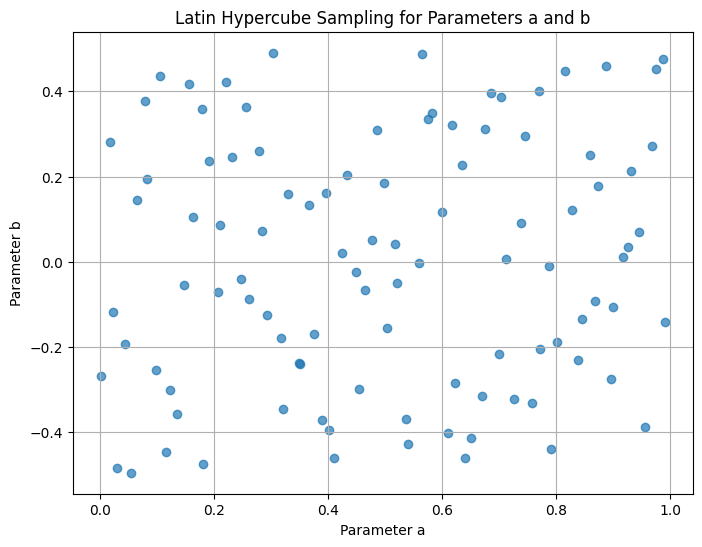

In [18]:


# Plot the Latin Hypercube samples as a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(a_values, b_values, alpha=0.7)
plt.xlabel("Parameter a")
plt.ylabel("Parameter b")
plt.title("Latin Hypercube Sampling for Parameters a and b")
plt.grid(True)
plt.show()

## Question 10

For comparison, on the same plot, add a uniformly sampled realization of 100 $a$ and $b$ values.

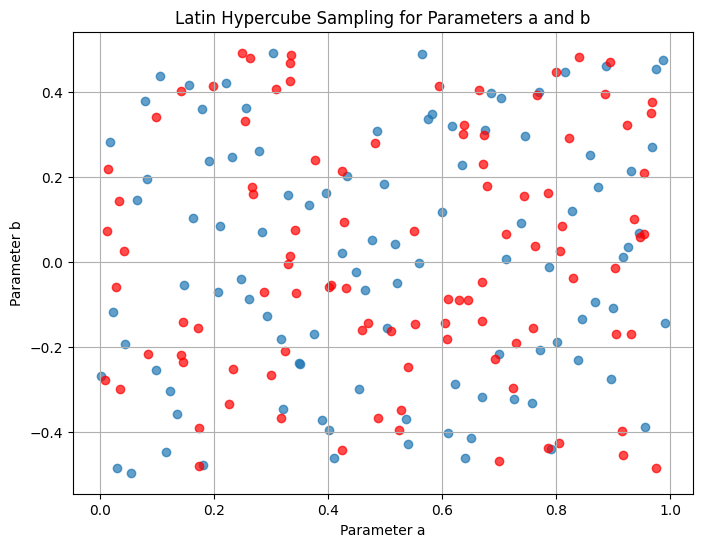

In [19]:
# Generate uniformly sampled values for `a` and `b`
ua_values = np.random.uniform(a_range[0], a_range[1], n_samples)
ub_values = np.random.uniform(b_range[0], b_range[1], n_samples)

# Plot the Latin Hypercube samples as a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(a_values, b_values, alpha=0.7)
plt.scatter(ua_values, ub_values, alpha=0.7,c='r')
plt.xlabel("Parameter a")
plt.ylabel("Parameter b")
plt.title("Latin Hypercube Sampling for Parameters a and b")
plt.grid(True)
plt.show()

As you can see, it hard to distinguish by eye. As an extension question, think of how you would proceed if 
you needed to prove that these samples come from different generative processes (uniform or Latin Hyper Cube). 

## Question 11


Create the interpolator. As you will realise, we are dealing with an irregular grid and need griddata.  

In [20]:
t = np.linspace(0, 1, 100)  # Time range with 100 points, always fixed

from scipy.interpolate import griddata
# Generate function samples for each (a, b) pair over time `t`
# Create lists to hold points and values for interpolation
points = []  # Will store (t, a, b) tuples
values = []  # Will store corresponding f(t, a, b, c, d, e) values

for a, b in zip(a_values, b_values):
    for time in t:
        points.append((time, a, b))
        values.append(f(time, a, b, c, d, e))  # Replace `f` with your actual function definition

# Convert lists to NumPy arrays for griddata use
points = np.array(points)  # Shape: (len(t) * n_samples, 3)
values = np.array(values)  # Shape: (len(t) * n_samples,)

# Define a function to interpolate over new values of `a` and `b` using griddata
def interpolate_f_over_a_b(tgrid, new_a, new_b):
    # Create an array of (time, new_a, new_b) points to interpolate
    query_points = np.array([(time, new_a, new_b) for time in tgrid])
    
    # Use griddata to interpolate the function at the given points
    interpolated_values = griddata(points, values, query_points, method='linear')
    return interpolated_values



## Question 12 

Show results on a sliding bar plot for $a$ and $b$.

On a second sliding bar plot, show the ratio.

In [21]:
a_values,b_values

(array([0.15670413, 0.2071182 , 0.46440195, 0.14745119, 0.39578159,
        0.27836466, 0.43304686, 0.9900852 , 0.5656025 , 0.19116015,
        0.42535866, 0.94568961, 0.80128645, 0.90028472, 0.38994017,
        0.36584377, 0.82701617, 0.76948165, 0.08210836, 0.79137126,
        0.61691218, 0.401776  , 0.10469598, 0.1796192 , 0.30308245,
        0.04464869, 0.29299632, 0.73883701, 0.86831739, 0.41087935,
        0.44957288, 0.68536802, 0.53587733, 0.02372609, 0.63449187,
        0.37588007, 0.66922887, 0.97524212, 0.75744373, 0.1809483 ,
        0.67442499, 0.72546071, 0.52113109, 0.88678017, 0.47779315,
        0.89599532, 0.23158168, 0.07863584, 0.81561822, 0.48540565,
        0.85880455, 0.16412278, 0.26157654, 0.84565322, 0.22050052,
        0.0647876 , 0.21067408, 0.69932894, 0.28369472, 0.4987345 ,
        0.00200038, 0.50293712, 0.5825966 , 0.09932979, 0.35176552,
        0.87383922, 0.9317957 , 0.70376217, 0.32031345, 0.45403111,
        0.77219458, 0.74519703, 0.71166775, 0.92

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

tn = np.linspace(0, 1, 100) 

# Define the interpolator function for dynamic plotting
def plot_with_interpolated_values(ap, bp):
    # Original function values for given `a` and `b`
    original_values = f(tn, ap, bp, c, d, e)  # Replace `f` with your actual function definition
    
    # Interpolated values for the given `a` and `b`
    # interpolated_values = interpolator([(time, ap, bp) for time in tn])
    interpolated_values = interpolate_f_over_a_b(tn, ap, bp)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(tn, original_values, label=r'$f(t; a, b)$', color='blue',ls='None',marker='o')
    plt.plot(tn, interpolated_values, label=r'$F_{interp}(t)$', color='red', linestyle='None',marker='o')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders for `a` and `b`
a_slider = FloatSlider(value=0.125, min=0.0, max=1.0, step=0.01, description='a')
b_slider = FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.01, description='b')

# Use `interact` to create the interactive plot
interact(plot_with_interpolated_values, ap=a_slider, bp=b_slider)


interactive(children=(FloatSlider(value=0.125, description='a', max=1.0, step=0.01), FloatSlider(value=0.0, de…

<function __main__.plot_with_interpolated_values(ap, bp)>

In [23]:

# Define the interpolator function for dynamic plotting
def plot_with_interpolated_values(ap, bp):
    # Original function values for given `a` and `b`
    original_values = f(tn, ap, bp, c, d, e)  # Replace `f` with your actual function definition
    
    # Interpolated values for the given `a` and `b`
    interpolated_values = interpolate_f_over_a_b(tn, ap, bp)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(tn, 100*(interpolated_values-original_values)/original_values, label=r'relative difference', color='red', linestyle='--')
    plt.xlabel('Time $t$')
    plt.ylabel(r'rel diff %')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.ylim(-2,2)
    plt.grid(True)
    plt.show()

# Define sliders for `a` and `b`
a_slider = FloatSlider(value=0.125, min=0.0, max=1.0, step=0.01, description='a')
b_slider = FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.01, description='b')

# Use `interact` to create the interactive plot
interact(plot_with_interpolated_values, ap=a_slider, bp=b_slider)

interactive(children=(FloatSlider(value=0.125, description='a', max=1.0, step=0.01), FloatSlider(value=0.0, de…

<function __main__.plot_with_interpolated_values(ap, bp)>

## Question 13

Compare memory and time of the function call and interpolator call. Comment. 

In [24]:
import numpy as np
import tracemalloc
import timeit

# Define the time array `tn`
tn = np.linspace(0, 1, 100)  # Increase number of points for the test
ap = 0.125  # Fixed values for parameters
bp = 0.1
c, d, e = 1.0, 1.0, 1.0  # Fixed parameters for `f`

# Define a wrapper function to measure the original function call
def original_function_call():
    return f(tn, ap, bp, c, d, e)  # Replace `f` with your actual function definition

# Define a wrapper function to measure the interpolator call
def interpolator_call():
    return interpolate_f_over_a_b(tn, ap, bp)

# Measure time
time_original = timeit.timeit(original_function_call, number=10)
time_interpolator = timeit.timeit(interpolator_call, number=10)

# Measure memory using tracemalloc
def measure_memory(func):
    tracemalloc.start()
    func()  # Run the function to allocate memory
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / (1024 * 1024)  # Memory in MB

memory_original = measure_memory(original_function_call)
memory_interpolator = measure_memory(interpolator_call)

# Print results
print(f"Original function call time (10 runs): {time_original:.4f} seconds")
print(f"Interpolator call time (10 runs): {time_interpolator:.4f} seconds")
print(f"Original function call memory usage: {memory_original:.4f} MB")
print(f"Interpolator call memory usage: {memory_interpolator:.4f} MB")


Original function call time (10 runs): 0.0001 seconds
Interpolator call time (10 runs): 4.3116 seconds
Original function call memory usage: 0.0027 MB
Interpolator call memory usage: 10.9156 MB


## Question 14

Add a third parameter, $c$ to our interpolation problem and repeat questions 9 to 13. Comment. 

In [25]:
import numpy as np
import pandas as pd
from scipy.interpolate import RegularGridInterpolator
from pyDOE import lhs  # For Latin Hypercube Sampling

# Define the ranges for `a`, `b`, and `t`
t = np.linspace(0, 1, 100)  # Time range with 100 points
a_range = (0., 1.0)
b_range = (-0.5, 0.5)
c_range = (5, 10)

# Generate Latin Hypercube samples for `a` and `b`
n_samples = 100  # Define the number of samples for each parameter
lhs_samples = lhs(3, samples=n_samples)  # Latin Hypercube sampling in 2D



# Scale the samples to the range of `a` and `b`
a_values = a_range[0] + lhs_samples[:, 0] * (a_range[1] - a_range[0])
b_values = b_range[0] + lhs_samples[:, 1] * (b_range[1] - b_range[0])
c_values = c_range[0] + lhs_samples[:, 2] * (c_range[1] - c_range[0])

Text(0.5, 0.92, '3D Latin Hypercube Sampling for Parameters a, b, and c')

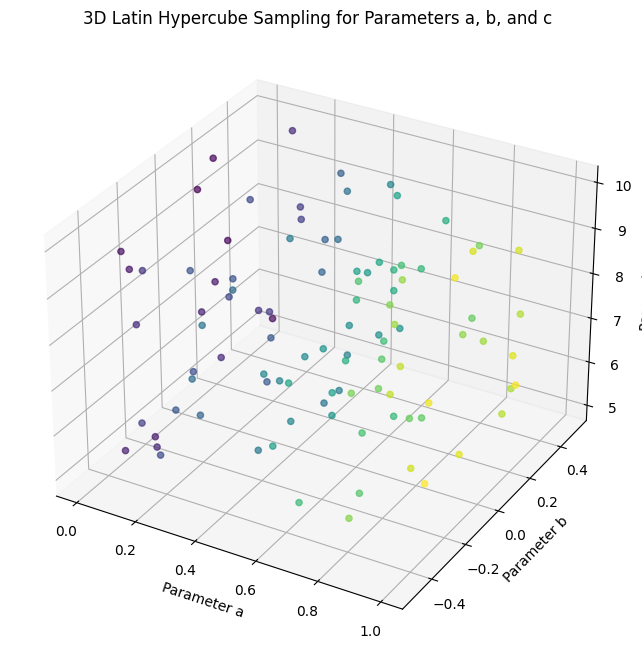

In [26]:


# Plot the Latin Hypercube samples in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(a_values, b_values, c_values, c=a_values, cmap='viridis', marker='o', alpha=0.7)

# Set plot labels and title
ax.set_xlabel('Parameter a')
ax.set_ylabel('Parameter b')
ax.set_zlabel('Parameter c')
ax.set_title('3D Latin Hypercube Sampling for Parameters a, b, and c')

# Add a 

In [27]:
t = np.linspace(0, 1, 100)  # Time range with 100 points, always fixed

from scipy.interpolate import griddata
# Generate function samples for each (a, b) pair over time `t`
# Create lists to hold points and values for interpolation
points = []  # Will store (t, a, b) tuples
values = []  # Will store corresponding f(t, a, b, c, d, e) values

for a, b, c in zip(a_values, b_values,c_values):
    for time in t:
        points.append((time, a, b, c))
        values.append(f(time, a, b, c, d, e))  # Replace `f` with your actual function definition

# Convert lists to NumPy arrays for griddata use
points = np.array(points)  # Shape: (len(t) * n_samples, 3)
values = np.array(values)  # Shape: (len(t) * n_samples,)

# Define a function to interpolate over new values of `a` and `b` using griddata
def interpolate_f_over_a_b_c(tgrid, new_a, new_b, new_c):
    # Create an array of (time, new_a, new_b) points to interpolate
    query_points = np.array([(time, new_a, new_b, new_c) for time in tgrid])
    
    # Use griddata to interpolate the function at the given points
    interpolated_values = griddata(points, values, query_points, method='linear')
    return interpolated_values


In [28]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import ipywidgets as widgets

tn = np.linspace(0, 1, 100) 

# Define the interpolator function for dynamic plotting
def plot_with_interpolated_values(ap, bp, cp):
    # Original function values for given `a` and `b` and `c` 
    original_values = f(tn, ap, bp, cp, d, e)  # Replace `f` with your actual function definition
    
    # Interpolated values for the given `a` and `b` and `c` 
    interpolated_values = interpolate_f_over_a_b_c(tn, ap, bp, cp)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(tn, original_values, label=r'$f(t; a, b, c)$', color='blue', linestyle='None',marker='o')
    plt.plot(tn, interpolated_values, label=r'$F_{interp}(t)$', color='red', linestyle='None',marker='o')
    plt.xlabel('Time $t$')
    plt.ylabel(r'$f(t)$')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define sliders for `a` and `b`
a_slider = FloatSlider(value=0.125, min=0.0, max=1.0, step=0.01, description='a')
b_slider = FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.01, description='b')
c_slider = FloatSlider(value=6, min=5, max=10, step=0.01, description='c')
# Use `interact` to create the interactive plot
interact(plot_with_interpolated_values, ap=a_slider, bp=b_slider, cp=c_slider)


interactive(children=(FloatSlider(value=0.125, description='a', max=1.0, step=0.01), FloatSlider(value=0.0, de…

<function __main__.plot_with_interpolated_values(ap, bp, cp)>

In [29]:

# Define the interpolator function for dynamic plotting
def plot_with_interpolated_values(ap, bp, cp):
    # Original function values for given `a` and `b`
    original_values = f(tn, ap, bp, cp, d, e)  # Replace `f` with your actual function definition
    
    # Interpolated values for the given `a` and `b`
    interpolated_values = interpolate_f_over_a_b_c(tn, ap, bp, cp)
    
    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(tn, 100*(interpolated_values-original_values)/original_values, label=r'relative difference', color='red', linestyle='--')
    plt.xlabel('Time $t$')
    plt.ylabel(r'rel diff %')
    plt.title(r'Time Series $f(t; a, b, c)$')
    plt.legend()
    plt.ylim(-2,2)
    plt.grid(True)
    plt.show()

# Define sliders for `a` and `b`
a_slider = FloatSlider(value=0.125, min=0.0, max=1.0, step=0.01, description='a')
b_slider = FloatSlider(value=0.0, min=-0.5, max=0.5, step=0.01, description='b')
c_slider = FloatSlider(value=9, min=5, max=10, step=0.01, description='c')
# Use `interact` to create the interactive plot
interact(plot_with_interpolated_values, ap=a_slider, bp=b_slider, cp=c_slider)

interactive(children=(FloatSlider(value=0.125, description='a', max=1.0, step=0.01), FloatSlider(value=0.0, de…

<function __main__.plot_with_interpolated_values(ap, bp, cp)>

In [119]:
import numpy as np
import tracemalloc
import timeit

# Define the time array `tn`
tn = np.linspace(0, 1, 100)  # Increase number of points for the test
ap = 0.125  # Fixed values for parameters
bp = 0.1
cp = 9.
d, e = 1.0, 1.0  # Fixed parameters for `f`

# Define a wrapper function to measure the original function call
def original_function_call():
    return f(tn, ap, bp, cp, d, e)  # Replace `f` with your actual function definition

# Define a wrapper function to measure the interpolator call
def interpolator_call():
    return interpolate_f_over_a_b_c(tn, ap, bp, cp)

# Measure time
time_original = timeit.timeit(original_function_call, number=100)
time_interpolator = timeit.timeit(interpolator_call, number=1)

# Measure memory using tracemalloc
def measure_memory(func):
    tracemalloc.start()
    func()  # Run the function to allocate memory
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    return peak / (1024 * 1024)  # Memory in MB

memory_original = measure_memory(original_function_call)
memory_interpolator = measure_memory(interpolator_call)

# Print results
print(f"Original function call time (100 runs): {time_original:.4f} seconds")
print(f"Interpolator call time (1 runs): {time_interpolator:.4f} seconds")
print(f"Original function call memory usage: {memory_original:.4f} MB")
print(f"Interpolator call memory usage: {memory_interpolator:.4f} MB")


Original function call time (100 runs): 0.0019 seconds
Interpolator call time (1 runs): 4.3255 seconds
Original function call memory usage: 0.0027 MB
Interpolator call memory usage: 66.6761 MB


## Question 15

Instead of interpolating with the griddata method, use (i) a gaussian process, and (ii) a neural network whose output layer is the function predicted at the 100 points of the time grid and input layer is a,b,c values.  

What do you observe in terms of time, memory? Comment on scalability. 


For the neural net part of this question use Google Colab and the GPUs there. 

In [27]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Define a Gaussian Process model with an RBF kernel
kernel = C(1.0) * RBF(length_scale=[1.0, 1.0, 1.0, 1.0])
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-3)



In [28]:
# Train the GP model
gp.fit(points, values)


GaussianProcessRegressor(alpha=0.001,
                         kernel=1**2 * RBF(length_scale=[1, 1, 1, 1]),
                         n_restarts_optimizer=10)

In [29]:

# Define the interpolation function using the trained GP
def interpolate_f_over_a_b_c_gp(tgrid, new_a, new_b, new_c):
    # Prepare query points
    query_points = np.array([(time, new_a, new_b, new_c) for time in tgrid])
    # Predict using the GP model
    interpolated_values, _ = gp.predict(query_points, return_std=True)
    return interpolated_values


In [31]:
# Define a wrapper function to measure the interpolator call
def interpolator_gp_call():
    return interpolate_f_over_a_b_c_gp(tn, ap, bp, cp)

In [32]:
time_interpolator_gp = timeit.timeit(interpolator_gp_call, number=1)
print(f"Interpolator call time (1 runs): {time_interpolator_gp:.4f} seconds")

Interpolator call time (1 runs): 0.2925 seconds


In [34]:
memory_interpolator_gp = measure_memory(interpolator_gp_call)
print(f"Interpolator call memory usage: {memory_interpolator_gp:.4f} MB")


Interpolator call memory usage: 30.5227 MB


### Note on Gaussian Process vs Neural Net


Gaussian Process (GP) Interpolation

Gaussian Processes are a probabilistic model for regression that can handle multi-dimensional interpolation. They are particularly useful when the function is smooth and continuous.

1. **Prepare Training Data**: Use your `(t, a, b, c)` points as inputs and the function values as outputs.

2. **Train a Gaussian Process Regressor**.

3. **Use the Trained GP for Interpolation**.

Explanation of the Gaussian Process Code

1. **Kernel**: We use an RBF (Radial Basis Function) kernel, which is commonly used for smooth interpolation tasks. The `length_scale` controls the smoothness along each dimension.

2. **Training the GP**: The GP model is trained on the `(t, a, b, c)` points with corresponding function values.

3. **Interpolating**: `interpolate_f_over_a_b_c_gp` uses the trained GP to interpolate over new values of `a`, `b`, and `c`.



| Method               | Pros                                                                                             | Cons                                                                  |
|----------------------|--------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------|
| **Gaussian Process** | Provides uncertainty estimates; works well for smooth, continuous functions                      | Slower for large datasets; memory-intensive                           |
| **Neural Network**   | Scales well to large datasets; works for complex, non-linear functions                           | No uncertainty estimates; requires more data for training stability   |

Choose the method based on the size of your dataset and the nature of your function `f`. Gaussian Processes are typically best for small to moderate-sized datasets with smooth functions, while neural networks are better for larger datasets or more complex functions.

## Note on Latin Hyper Cube sampling

Why not using uniform sampling?

No, Latin Hypercube Sampling (LHS) is not the same as uniform (random) sampling. While both methods aim to sample points across a parameter space, they differ in how they distribute those points, especially in higher dimensions.



1. **Stratification**:
   
   - **Latin Hypercube Sampling** divides the range of each parameter into equal intervals and ensures that each interval is sampled exactly once. This helps LHS achieve a more uniform distribution across the parameter space by avoiding clusters and ensuring coverage across all intervals.
   
   - **Uniform (Random) Sampling**, on the other hand, does not enforce such stratification, so points can cluster together or leave large gaps in the parameter space.

2. **Dimensional Coverage**:
   
   - **LHS** is particularly effective in high-dimensional spaces because it ensures each sampled point covers different parts of each dimension.
   
   - **Uniform Sampling** lacks this structured approach, so some dimensions may not be as well-covered, especially with a limited number of samples.

3. **Sample Distribution**:
   
   - With **LHS**, each row and each column in a 2D sampling grid (or each "slice" in higher dimensions) contains exactly one sample point. This constraint leads to a better spread of points.
   
   - **Uniform Sampling** does not have this constraint, which can lead to points overlapping or clustering in certain areas.



In a 2D plot:
- **LHS** will ensure that each interval along both the `a` and `b` axes is sampled once, leading to a "grid-like" distribution.
- **Uniform Sampling** will scatter points without ensuring they appear in every interval, so it may result in some intervals having multiple points while others have none.
